
## <u>Step 1</u> Importing Libraries

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
sns.set()
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


## <u>Step 2</u>  Reading data file into a python data frame

In [145]:
data = pd.read_csv('india-districts-census-2011.csv')
data.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


## <u>Step 3</u> Statistical Summary

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Columns: 118 entries, District code to Total_Power_Parity
dtypes: int64(116), object(2)
memory usage: 590.1+ KB


In [147]:
data.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,...,786.046875,1696.456250,294.000000,215.300000,509.300000,194.204688,261.245313,455.450000,279.631250,3315.412500
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,5.924144e+05,4.801816e+05,3.129818e+05,1.611216e+05,1.520336e+05,...,1038.854733,1720.535151,638.345281,362.684243,968.538748,424.108001,587.279450,1007.364839,1050.934537,4638.568719
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,2.764365e+05,2.008920e+05,8.320850e+04,4.230700e+04,4.267175e+04,...,236.750000,589.000000,59.000000,24.750000,95.000000,19.000000,21.000000,44.000000,18.000000,1024.250000
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,5.483525e+05,4.038590e+05,2.460160e+05,1.255485e+05,1.178550e+05,...,518.000000,1220.500000,149.000000,118.500000,278.000000,84.000000,85.500000,186.500000,60.500000,2238.500000
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,9.188582e+05,6.641550e+05,4.477078e+05,2.284602e+05,2.140502e+05,...,941.250000,2233.250000,296.500000,262.000000,564.500000,213.250000,293.000000,497.000000,215.500000,3959.000000
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,10334.000000,13819.000000,10835.000000,3595.000000,14430.000000,5027.000000,7597.000000,12624.000000,18289.000000,60163.000000


## <u>Step 4</u> Checking for null values

In [148]:
data.isnull().sum()

District code                    0
State name                       0
District name                    0
Population                       0
Male                             0
                                ..
Power_Parity_Rs_330000_425000    0
Power_Parity_Rs_425000_545000    0
Power_Parity_Rs_330000_545000    0
Power_Parity_Above_Rs_545000     0
Total_Power_Parity               0
Length: 118, dtype: int64

* There are no null values so carrying forword with our analysis

## <u>Step 5</u> Dumping unwanted columns

In [149]:
data.drop(['SC','Male_SC','Female_SC','ST','Male_ST','Female_ST','Male_Workers','Female_Workers','Hindus','Muslims','Christians','Sikhs','Buddhists','Jains','Others_Religions','Religion_Not_Stated','LPG_or_PNG_Households','Households_with_Bicycle','Households_with_Car_Jeep_Van','Households_with_Radio_Transistor','Households_with_Scooter_Motorcycle_Moped','Married_couples_1_Households','Married_couples_2_Households','Married_couples_3_Households','Married_couples_3_or_more_Households','Married_couples_4_Households','Married_couples_5__Households','Married_couples_None_Households','Household_size_1_person_Households','Household_size_2_persons_Households','Household_size_1_to_2_persons','Household_size_3_persons_Households','Household_size_3_to_5_persons_Households','Household_size_4_persons_Households','Household_size_5_persons_Households','Household_size_6_8_persons_Households','Household_size_9_persons_and_above_Households','Location_of_drinking_water_source_Away_Households','Type_of_bathing_facility_Enclosure_without_roof_Households','Type_of_fuel_used_for_cooking_Any_other_Households','Type_of_latrine_facility_Pit_latrine_Households','Type_of_latrine_facility_Other_latrine_Households','Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households','Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households','Not_having_bathing_facility_within_the_premises_Total_Households','Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households','Main_source_of_drinking_water_Un_covered_well_Households','Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households','Main_source_of_drinking_water_Spring_Households','Main_source_of_drinking_water_River_Canal_Households','Main_source_of_drinking_water_Other_sources_Households','Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households','Location_of_drinking_water_source_Near_the_premises_Households','Location_of_drinking_water_source_Within_the_premises_Households','Main_source_of_drinking_water_Tank_Pond_Lake_Households','Main_source_of_drinking_water_Tapwater_Households','Main_source_of_drinking_water_Tubewell_Borehole_Households','Condition_of_occupied_census_houses_Dilapidated_Households','Households_with_separate_kitchen_Cooking_inside_house','Having_bathing_facility_Total_Households','Having_latrine_facility_within_the_premises_Total_Households','Ownership_Owned_Households','Ownership_Rented_Households','Households_with_Telephone_Mobile_Phone_Landline_only','Households_with_Telephone_Mobile_Phone_Mobile_only','Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car','Households_with_Television','Households_with_Telephone_Mobile_Phone','Households_with_Telephone_Mobile_Phone_Both'
                        ,'Housholds_with_Electric_Lighting'], axis=1, inplace= True)

Here we deleted colums that were not suitable for the purpose of the analysis for our business problem

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   District code                    640 non-null    int64 
 1   State name                       640 non-null    object
 2   District name                    640 non-null    object
 3   Population                       640 non-null    int64 
 4   Male                             640 non-null    int64 
 5   Female                           640 non-null    int64 
 6   Literate                         640 non-null    int64 
 7   Male_Literate                    640 non-null    int64 
 8   Female_Literate                  640 non-null    int64 
 9   Workers                          640 non-null    int64 
 10  Main_Workers                     640 non-null    int64 
 11  Marginal_Workers                 640 non-null    int64 
 12  Non_Workers                      640

As you can see now we have left with a Dataframe that is only 49 columns down from 118 columns

## <u>Step 6</u> Exploring for insights at State level


There are many valuable varibles from the above list but for the starter let's select population and state columns.

In [151]:
fig = px.histogram(data, 
                   x="State name", 
                   y = "Population", 
                   title='Population Vs States')
fig.update_layout(bargap=0.1)
fig.show()

So there are many states which can be selected for our start up to launch their services in solely based on population count.

Most likely more business will be generssated from states like :
<b>
* Rajasthan 
* Uttarpradesh 
* Bihar
* West Bengal
* Madhya Pradesh 
* Gujarat
* Maharastra
* Andhar Pradesh
* Karnataka 
* and Tamil Nadu
</b>
<u> Note </u>:- These are states with population greater than 50 Millions and this does not visualize whole scenario it is just a speculation based on Total population count of the above given states.

#### Now, let's explore number of literate people residing in every state as literacy rate is directly Corrolated by regular medical check ups.

In [152]:
fig = px. histogram(data,
                   x = "State name",
                   y = "Literate",
                   title = "Literate Population per State")
fig.update_layout(bargap = 0.1)
fig.show()

So most off the states that we selected earlier based on population has adequet amount of literate people.But To select a few i would state :
<b>
   * Rajasthan(least literate population count)
   * Uttar Pradesh(Highest literate population count)
   * Bihar
   * West Bengal
   * madhya Pradesh
   * Gujarat
   * Maharastra
   * Andra Pradesh
   * Karnataka
   * and Tamil Nadu
 </b>

Our company provides servies on online appointment basis and basic need for that would be an internet connection so let's plot for that

In [153]:
fig = px.histogram(data,
                  x = "State name",
                  y = "Households_with_Internet",
                  title = "Households with Internet in every state")
fig.show()

From above figure it is evident that most internet users will be in Maharastra but let's make a list of states which have households with internet over 0.5 Millions or close to this base limit :

* NCT of Delhi
* Uttar Pradesh
* West Bengal
* Gujarat(Least users)
* Maharastra(Maximum users)
* Andhra Pradesh
* Karnataka
* Kerala
* Tamil Nadu


##### previous analysis shows why it was necessary to visulize amounts of household with internet because even if state would have larger population base it does not gurentee it will generate business for the company like Bio-Tech as it is online service provider and which would indicate total number of internet users per state is very important variable than only focusing on total population that state has. 

## <u>Step 7</u> Exploring for Insights at District level

### Now, we are going to explore district vise data diving deep in to our previous findings for top four states for highest number of internet users

Firstly, we are going to make separate data frame for data of above listed states

In [154]:
NCT_of_Delhi = data[data['State name'] == "NCT OF DELHI"]
Uttar_Pradesh = data[data['State name'] == "UTTAR PRADESH"]
West_Bengal = data[data['State name'] == "WEST BENGAL"]
Gujarat = data[data['State name'] == "GUJARAT"]
Maharashtra = data[data['State name'] == "MAHARASHTRA"]
Andra_Pradesh = data[data['State name'] == "ANDRA PRADESH"]
Karnataka = data[data['State name'] == "KARNATAKA"]
Kerala = data[data['State name'] == "KERALA"]
Tamil_Nadu = data[data['State name'] == "TAMIL NADU"]

### It will be a very tedious task to write code for each and every state vise dataframes that we made recently. So we are going to define a function for that purpose.

In [155]:
def Explore_districts_of(state):
    fig = px.histogram(state,
                       marginal = 'box',
                       x="District name", 
                       y = "Population", 
                       title='Population Vs Districts')
    fig.update_layout(bargap=0.1)
    fig.show()

    fig = px.histogram(state, 
                       marginal = 'box',
                       x="District name", 
                       y = "Literate", 
                       title='Number of Literate Vs Districts')
    fig.update_layout(bargap=0.1)
    fig.show()

    fig = px.histogram(state,
                      marginal = 'box',
                      x = "District name",
                      y = "Households_with_Internet",
                      title = "Households with Internet in every District")
    fig.show()

We are all set now first we are going for capital of our country after that we will choose every last state that we made a list for

## (1) Uttar Pradesh

In [156]:
Explore_districts_of(Uttar_Pradesh)

## (2) Karnataka

In [157]:
Explore_districts_of(Karnataka)

## (3) Tamil Nadu

In [158]:
Explore_districts_of(Tamil_Nadu)

## (4) Maharashtra

In [159]:
Explore_districts_of(Maharashtra)

## <u>Step 8</u> Gathering Insights for few selected states

## Let's dive deep into these states before selecting one for our first market

In [160]:
Selected_States = pd.concat([Uttar_Pradesh, Maharashtra, Tamil_Nadu, Karnataka], axis=0)

In [161]:
Selected_States

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Workers,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
131,132,UTTAR PRADESH,Saharanpur,3466382,1834106,1632276,2077108,1220114,856994,1037344,...,974,2349,251,332,583,223,138,361,125,4029
132,133,UTTAR PRADESH,Muzaffarnagar,4143512,2193434,1950078,2417339,1448528,968811,1291644,...,1114,2813,316,416,732,234,173,407,149,4871
133,134,UTTAR PRADESH,Bijnor,3682713,1921215,1761498,2135393,1241471,893922,1088036,...,930,2481,289,381,670,187,142,329,109,4310
134,135,UTTAR PRADESH,Moradabad,4772006,2503186,2268820,2263848,1357435,906413,1417811,...,1250,3125,357,464,821,253,226,479,198,5452
135,136,UTTAR PRADESH,Rampur,2335819,1223889,1111930,1043666,630408,413258,737261,...,474,1439,186,239,425,82,92,174,48,2545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,580,KARNATAKA,Yadgir,1174271,590329,583942,510003,306751,203252,547696,...,563,1257,184,124,308,174,242,416,112,2440
580,581,KARNATAKA,Kolar,1536401,776396,760005,1016219,564110,452109,717872,...,799,1806,206,193,399,271,394,665,41,3389
581,582,KARNATAKA,Chikkaballapura,1255104,636437,618667,783222,442158,341064,639778,...,121,250,30,19,49,27,43,70,39,471
582,583,KARNATAKA,Bangalore Rural,990923,509172,481751,688749,385311,303438,459891,...,368,748,113,59,172,83,135,218,120,1422


In [162]:

fig = px.treemap(Selected_States, 
                 path=['State name','District name'], 
                 values='Population',
                 color='Households_with_Internet', 
                 color_continuous_scale='RdBu',
                title = 'Finding out best Market')
fig.update_layout(bargap=1,autosize=False,
    width=800,
    height=800,)
fig.show()

fig = px.sunburst(Selected_States, 
                 path=['State name','District name'], 
                 values='Population',
                 color='Households_with_Internet', 
                 color_continuous_scale='RdBu',
                title = 'Finding out best Market')
fig.update_layout(
    autosize=False,
    width=800,
    height=800)
fig.show()

## <I> larger the portion of district in above visuals shows larger total population and color inclination towards darker shades of blue means larger number of households with internet connection</I>

### So it seems there are five districts that looks like promising greater business opportunity for us. especially three of which are in Maharashtra.

## <u>Step 9</u> Recommendations based on our EDA

<font size = 3>
<br>

* Our company should encorrporate some advance data collection methods like foccus groups and mass public surveys to this states and specially to the states corresponding to five districts that show great promise of business gains.public surveys can be conducted online too by giving out incentives or discounts to customers that take part in it. By doing so we are also finalizing our customer base by marketing and also collecting data that can be used to create pyschographic profiles of the participants which will give us enough understanding of the local community, their values and their attitude towards online health services.


* This type of data collection needs to be done at a large scale to get rid of bias which is a very dangerous for our analysis.


* My personal judgement leans towards Maharashtran market as this state has more districts that are attractivve for our profits but also has quality population which has internet services and higher literacy rates.

    
* Marketing department should first penetrate larger cities which has denser population because more the density of population faster will be the word of mouth marketing like a wildfire spreading across dense forest.

    
* After establishing concrete business there we should move towards cities with lesser public and then towards the rural areas as rural segment is very hard to deal with for many reasons like providing fast customer service is very challenging, inventory storage in near by areas is very costly and also possibility of people adopting this change of online healthcare services is very less to allocate our resources to.


In [163]:
Selected_States.drop(['Power_Parity_Less_than_Rs_45000','Power_Parity_Rs_45000_90000','Power_Parity_Rs_90000_150000','Power_Parity_Rs_45000_150000','Power_Parity_Rs_150000_240000','Power_Parity_Rs_240000_330000','Power_Parity_Rs_150000_330000','Power_Parity_Rs_330000_425000','Power_Parity_Rs_425000_545000','Power_Parity_Rs_330000_545000','Power_Parity_Above_Rs_545000','Total_Power_Parity','Male_Literate','Female_Literate','Workers','Main_Workers','Marginal_Workers','Non_Workers','Cultivator_Workers','Agricultural_Workers','Household_Workers','Other_Workers','Below_Primary_Education','Primary_Education','Middle_Education','Secondary_Education','Higher_Education','Graduate_Education','Other_Education','Literate_Education','Illiterate_Education','Total_Education'], axis=1, inplace= True)
Selected_States.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 131 to 583
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   District code             168 non-null    int64 
 1   State name                168 non-null    object
 2   District name             168 non-null    object
 3   Population                168 non-null    int64 
 4   Male                      168 non-null    int64 
 5   Female                    168 non-null    int64 
 6   Literate                  168 non-null    int64 
 7   Households_with_Internet  168 non-null    int64 
 8   Households_with_Computer  168 non-null    int64 
 9   Rural_Households          168 non-null    int64 
 10  Urban_Households          168 non-null    int64 
 11  Households                168 non-null    int64 
 12  Age_Group_0_29            168 non-null    int64 
 13  Age_Group_30_49           168 non-null    int64 
 14  Age_Group_50            

In [164]:
Selected_States.corr()

,District code,Population,Male,Female,Literate,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
District code,1.000000,-0.121331,-0.141542,-0.098584,0.038961,0.159186,0.142389,-0.204762,0.209499,0.101705,-0.260047,0.061744,0.119018,-0.493138
Population,-0.121331,1.000000,0.999066,0.998844,0.969780,0.731503,0.800683,0.567404,0.794356,0.951945,0.984909,0.972116,0.948381,0.509430
Male,-0.141542,0.999066,1.000000,0.995832,0.966991,0.734823,0.802280,0.554203,0.797215,0.948948,0.986749,0.969173,0.940003,0.520352
Female,-0.098584,0.998844,0.995832,1.000000,0.970752,0.726202,0.797149,0.580840,0.789432,0.953189,0.980700,0.973254,0.955617,0.496164
Literate,0.038961,0.969780,0.966991,0.970752,1.000000,0.826475,0.882609,0.440882,0.887783,0.982464,0.918900,0.992420,0.973885,0.385775
Households_with_Internet,0.159186,0.731503,0.734823,0.726202,0.826475,1.000000,0.989140,-0.051928,0.958281,0.838044,0.652522,0.827668,0.752498,0.181041
Households_with_Computer,0.142389,0.800683,0.802280,0.797149,0.882609,0.989140,1.000000,0.051724,0.972786,0.894741,0.726316,0.885342,0.813343,0.227474
Rural_Households,-0.204762,0.567404,0.554203,0.580840,0.440882,-0.051928,0.051724,1.000000,0.022659,0.441759,0.609443,0.444223,0.533914,0.394247
Urban_Households,0.209499,0.794356,0.797215,0.789432,0.887783,0.958281,0.972786,0.022659,1.000000,0.906913,0.708097,0.894129,0.825743,0.217719
Households,0.101705,0.951945,0.948948,0.953189,0.982464,0.838044,0.894741,0.441759,0.906913,1.000000,0.892256,0.989566,0.965997,0.361519


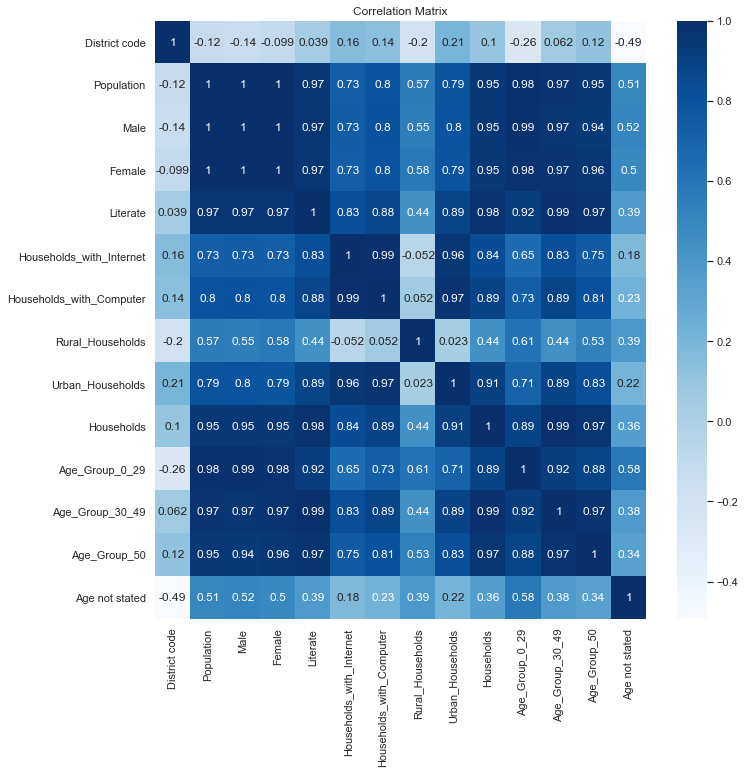

In [165]:
plt.figure(figsize=(11,11))
sns.heatmap(Selected_States.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

In [166]:
Selected_States

,District code,State name,District name,Population,Male,Female,Literate,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
131,132,UTTAR PRADESH,Saharanpur,3466382,1834106,1632276,2077108,9699,38816,605082,284156,889238,2228689,769736,433862,34095
132,133,UTTAR PRADESH,Muzaffarnagar,4143512,2193434,1950078,2417339,10077,56149,673746,296104,969850,2671757,911621,544283,15851
133,134,UTTAR PRADESH,Bijnor,3682713,1921215,1761498,2135393,7303,37341,683875,224648,908523,2404576,786305,450186,41646
134,135,UTTAR PRADESH,Moradabad,4772006,2503186,2268820,2263848,11690,61846,692398,355518,1047916,3168270,988486,525574,89676
135,136,UTTAR PRADESH,Rampur,2335819,1223889,1111930,1043666,3847,25960,396775,143217,539992,1576123,491164,258913,9619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,580,KARNATAKA,Yadgir,1174271,590329,583942,510003,1410,13216,207787,55208,262995,738451,267222,168186,412
580,581,KARNATAKA,Kolar,1536401,776396,760005,1016219,5051,27235,326567,151042,477609,841499,419380,274240,1282
581,582,KARNATAKA,Chikkaballapura,1255104,636437,618667,783222,2672,17360,315649,94053,409702,666451,350299,236864,1490
582,583,KARNATAKA,Bangalore Rural,990923,509172,481751,688749,3729,17066,231052,95410,326462,535765,278153,176083,922


In [167]:
LB = LabelEncoder()

In [168]:
Selected_States['State name'] = LB.fit_transform(Selected_States['State name'])
Selected_States['District name'] = LB.fit_transform(Selected_States['District name'])

In [169]:
advance_data = Selected_States
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(advance_data)
segmentation_std = pd.DataFrame(segmentation_std,columns=advance_data.columns)

In [170]:
advance_data.corr()

,District code,State name,District name,Population,Male,Female,Literate,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
District code,1.000000,-0.795655,0.203548,-0.121331,-0.141542,-0.098584,0.038961,0.159186,0.142389,-0.204762,0.209499,0.101705,-0.260047,0.061744,0.119018,-0.493138
State name,-0.795655,1.000000,-0.027725,0.092411,0.104025,0.079290,-0.031222,-0.145091,-0.132109,0.163939,-0.161085,-0.075464,0.188273,-0.039677,-0.068558,0.391986
District name,0.203548,-0.027725,1.000000,-0.029396,-0.035803,-0.022206,0.012210,0.003727,0.003445,-0.011346,0.058343,0.047573,-0.069565,0.022360,0.038497,-0.098979
Population,-0.121331,0.092411,-0.029396,1.000000,0.999066,0.998844,0.969780,0.731503,0.800683,0.567404,0.794356,0.951945,0.984909,0.972116,0.948381,0.509430
Male,-0.141542,0.104025,-0.035803,0.999066,1.000000,0.995832,0.966991,0.734823,0.802280,0.554203,0.797215,0.948948,0.986749,0.969173,0.940003,0.520352
Female,-0.098584,0.079290,-0.022206,0.998844,0.995832,1.000000,0.970752,0.726202,0.797149,0.580840,0.789432,0.953189,0.980700,0.973254,0.955617,0.496164
Literate,0.038961,-0.031222,0.012210,0.969780,0.966991,0.970752,1.000000,0.826475,0.882609,0.440882,0.887783,0.982464,0.918900,0.992420,0.973885,0.385775
Households_with_Internet,0.159186,-0.145091,0.003727,0.731503,0.734823,0.726202,0.826475,1.000000,0.989140,-0.051928,0.958281,0.838044,0.652522,0.827668,0.752498,0.181041
Households_with_Computer,0.142389,-0.132109,0.003445,0.800683,0.802280,0.797149,0.882609,0.989140,1.000000,0.051724,0.972786,0.894741,0.726316,0.885342,0.813343,0.227474
Rural_Households,-0.204762,0.163939,-0.011346,0.567404,0.554203,0.580840,0.440882,-0.051928,0.051724,1.000000,0.022659,0.441759,0.609443,0.444223,0.533914,0.394247


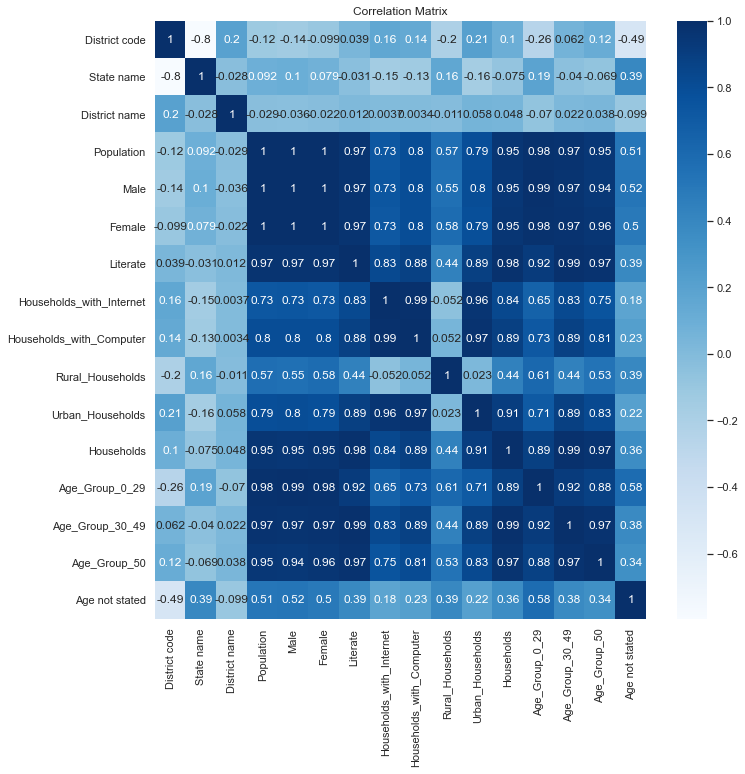

In [171]:
plt.figure(figsize=(11,11))
sns.heatmap(advance_data.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

In [172]:
segmentation_std= pd.DataFrame(segmentation_std)
print(segmentation_std.max())

District code               1.179951
State name                  0.992915
District name               1.721771
Population                  5.202932
Male                        5.278704
Female                      5.107227
Literate                    5.424253
Households_with_Internet    7.381445
Households_with_Computer    7.382053
Rural_Households            3.433510
Urban_Households            6.289856
Households                  5.833210
Age_Group_0_29              4.936360
Age_Group_30_49             5.685461
Age_Group_50                4.571477
Age not stated              4.137599
dtype: float64


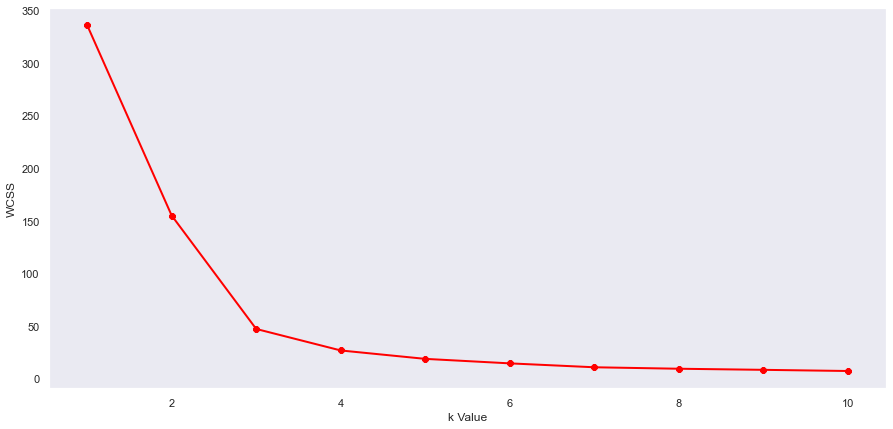

In [173]:
X1 = segmentation_std.loc[:, ["Population","Literate"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [174]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(X1)
print(label)

[1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 2 2 1 1 2 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0]


In [175]:
print(kmeans.cluster_centers_)

[[-0.56327527 -0.51218995]
 [ 0.72152495  0.59677741]
 [ 4.46468283  4.91976113]]


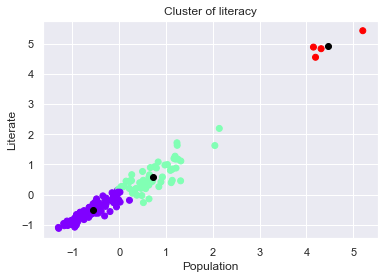

In [176]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of literacy')
plt.xlabel('Population')
plt.ylabel('Literate')
plt.show()

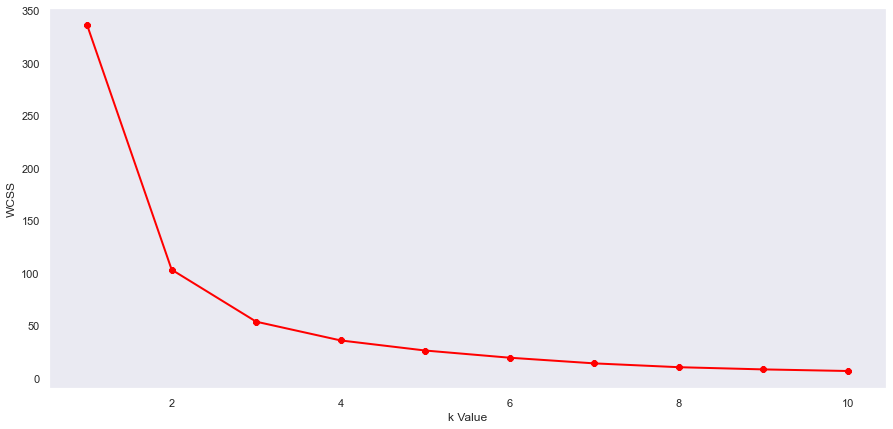

In [177]:
X1 = segmentation_std.loc[:, ["Households_with_Internet","Literate"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [178]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(X1)
print(label)

[2 2 2 2 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 0 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 0 2 2 2 0 2 0 0 0 0 0 0 0 2
 2 0 0 2 0 2 0 0 0 0 2 2 0 0 0 2 2 1 1 2 2 1 2 0 0 0 2 2 0 0 2 2 2 1 2 2 0
 2 2 0 0 0 0 0 2 0 0 2 0 0 2 0 0 2 0 0 0 0 2 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 1 0 0 0 0 2 0 0 0 0 0 0 0]


In [179]:
print(kmeans.cluster_centers_)

[[-0.27097743 -0.51980044]
 [ 5.18770938  4.27897896]
 [ 0.04886071  0.5912974 ]]


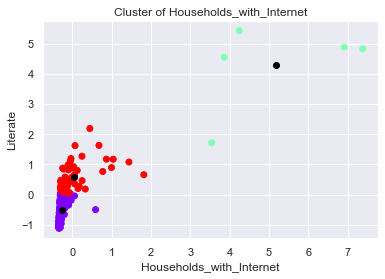

In [180]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of Households_with_Internet')
plt.xlabel('Households_with_Internet')
plt.ylabel('Literate')
plt.show()

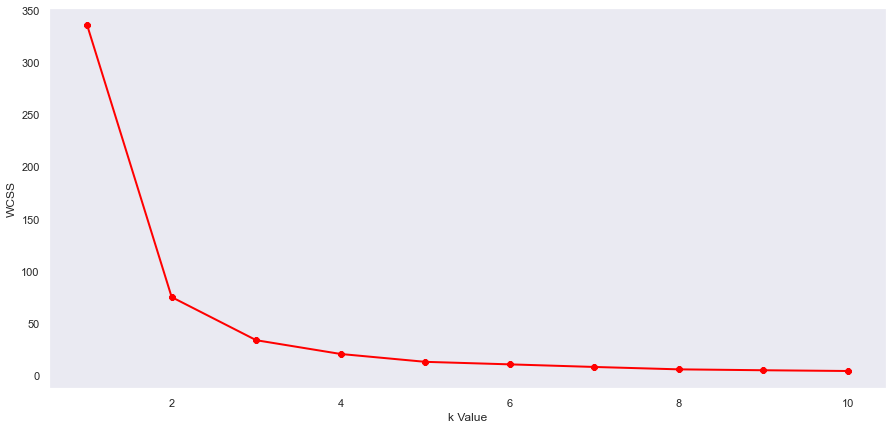

In [181]:
X1 = segmentation_std.loc[:, ["Urban_Households","Households_with_Computer"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [182]:
kmeans = KMeans(n_clusters= 2)
label = kmeans.fit_predict(X1)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


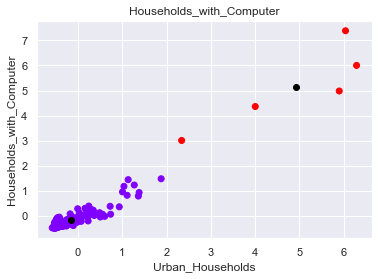

In [183]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Households_with_Computer')
plt.xlabel('Urban_Households')
plt.ylabel('Households_with_Computer')
plt.show()

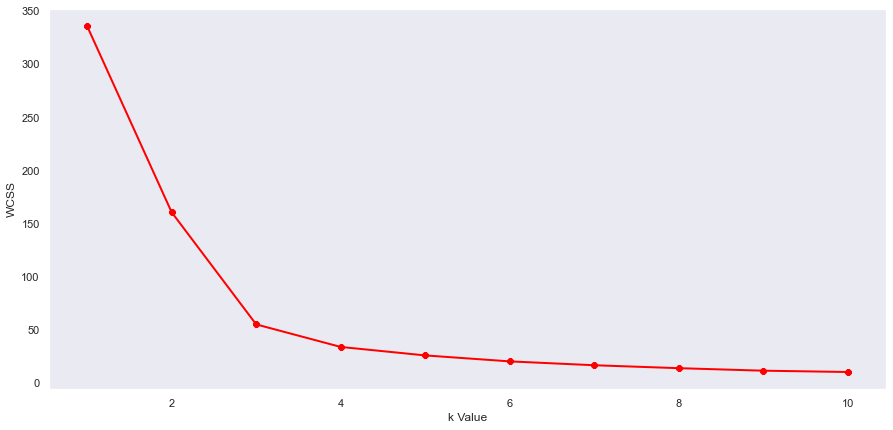

In [184]:
X1 = segmentation_std.loc[:, ["Age_Group_0_29","Literate"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [185]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X1)
print(label)

[3 0 0 0 3 1 3 1 0 1 3 0 1 3 0 3 1 3 0 1 3 0 0 0 3 0 3 1 1 1 1 1 0 1 1 1 1
 1 1 1 3 3 1 0 3 3 3 0 3 1 1 3 3 3 1 3 0 3 3 0 3 3 0 0 1 0 1 3 1 1 1 1 1 0
 3 1 1 3 1 0 1 1 1 1 3 3 1 1 1 0 0 2 2 3 3 2 0 3 3 1 0 3 1 1 0 3 0 0 0 0 3
 3 3 1 1 1 1 1 3 1 1 3 1 1 3 1 1 3 1 1 1 1 3 1 1 1 3 3 0 1 1 1 1 1 1 1 1 1
 3 1 1 1 1 1 3 2 1 1 1 1 3 1 3 1 1 1 1 1]


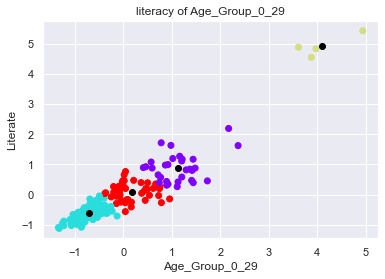

In [186]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('literacy of Age_Group_0_29')
plt.xlabel('Age_Group_0_29')
plt.ylabel('Literate')
plt.show()

In [187]:
Selected_States.head()

,District code,State name,District name,Population,Male,Female,Literate,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
131,132,3,129,3466382,1834106,1632276,2077108,9699,38816,605082,284156,889238,2228689,769736,433862,34095
132,133,3,107,4143512,2193434,1950078,2417339,10077,56149,673746,296104,969850,2671757,911621,544283,15851
133,134,3,28,3682713,1921215,1761498,2135393,7303,37341,683875,224648,908523,2404576,786305,450186,41646
134,135,3,104,4772006,2503186,2268820,2263848,11690,61846,692398,355518,1047916,3168270,988486,525574,89676
135,136,3,127,2335819,1223889,1111930,1043666,3847,25960,396775,143217,539992,1576123,491164,258913,9619


Text(0.5, 1.0, 'Correlation Matrix')

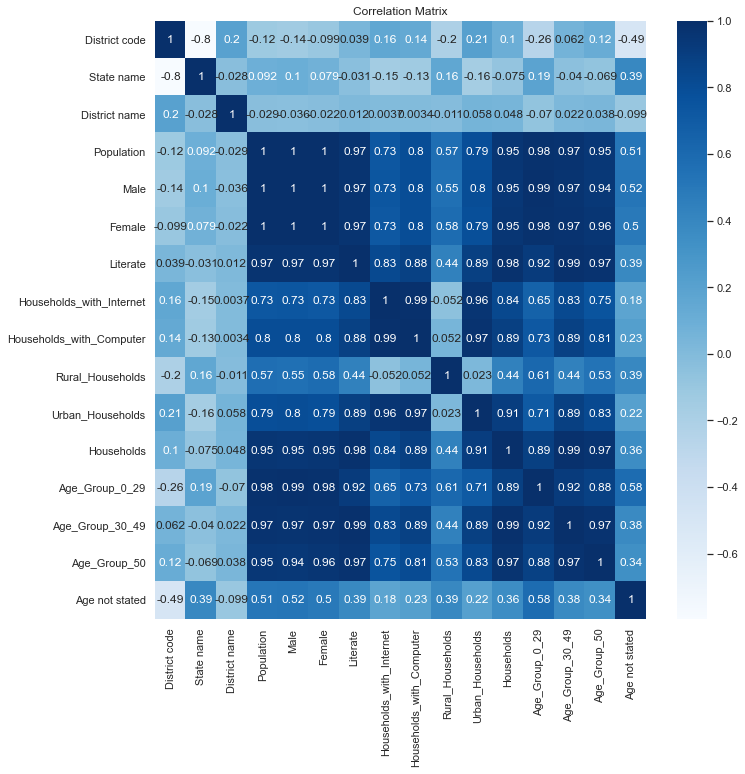

In [188]:
plt.figure(figsize=(11,11))
sns.heatmap(advance_data.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix')

In [189]:
x = Selected_States[['District code',	'State name', 'District name', 'Population', 'Male', 'Female', 'Literate',	
          'Households_with_Internet', 'Households_with_Computer', 'Rural_Households', 'Urban_Households',
	      'Households',	'Age_Group_0_29', 'Age_Group_30_49',	'Age_Group_50']].values
km = KMeans(n_clusters = 15, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [190]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Population'],
    y= segmentation_std['State name'],
    z= segmentation_std['District name'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States as well as District',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Population'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'District name')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [191]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Households'],
    y= segmentation_std['Rural_Households'],
    z= segmentation_std['Urban_Households'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Households in rural and urban',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Households'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [192]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['State name'],
    y= segmentation_std['Rural_Households'],
    z= segmentation_std['Urban_Households'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'households in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'State name'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [193]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_0_29'],
    y= segmentation_std['Rural_Households'],
    z= segmentation_std['Urban_Households'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'households of 0-29 age group',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_0_29'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [194]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_30_49'],
    y= segmentation_std['Rural_Households'],
    z= segmentation_std['Urban_Households'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'households of 30-40 Age groups',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_30_49'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [199]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_50'],
    y= segmentation_std['Rural_Households'],
    z= segmentation_std['Urban_Households'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Urban and Rural Households',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_50'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [196]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_0_29'],
    y= segmentation_std['State name'],
    z= segmentation_std['Population'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_0_29'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'Population')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [197]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_30_49'],
    y= segmentation_std['State name'],
    z= segmentation_std['Population'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_30_49'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'Population')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [198]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_50'],
    y= segmentation_std['State name'],
    z= segmentation_std['Population'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_50'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'Population')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)